In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

from scipy.stats import spearmanr

# With MISO alternative splicing annotation 

In [3]:
fasta = "/s/genomes/human/hg19/ensembl_GRCh37.p13_release75/Homo_sapiens.GRCh37.75.dna.primary_assembly.fa"
GFF = "/s/genomes/human/hg19/MISO/A3SS.hg19.nochr.selected.gff3"
miso = "/s/project/gtex-processed/recods/Data/MISO/A3SS_psi.csv"

In [4]:
from dataloader import SplicingMaxEntDataset

from kipoi.data import DataLoader
from kipoi.data_utils import numpy_collate

from model import MaxEntModel

/opt/modules/i12g/anaconda/3-4.1.1/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [5]:
data = SplicingMaxEntDataset(GFF, fasta, side = "3prime", target_file = miso, MISO_AS=True)

In [6]:
test = data[0]

test

{'inputs': array(['ACCCTCCCCATCCCCTGCAGGGC', 'AACTCTACCTCTTCTTGCAGCAT'], dtype='<U23'),
 'metadata': {'chrom': '2', 'extracted_regions': array([[130914246, 130914268],
         [130914197, 130914219]]), 'geneName': 'chr2:130914824:130914969:-@chr2:130914199|130914248:130914158:-', 'start': 130914158, 'stop': 130914969, 'strand': '-'},
 'targets': array([[0.825     , 0.175     ],
        [0.7       , 0.3       ],
        [0.80090909, 0.19909091]])}

In [7]:
from maxentpy import maxent
from maxentpy.maxent import load_matrix5, load_matrix3

In [8]:
matrix = load_matrix3()

In [9]:
maxent.score3("ACCCCTCCTTCTCCACCCAGGAG", matrix=matrix)

10.425592657022829

In [10]:
maxent.score3("ACCCTCCCCATCCCCTGCAGGGC", matrix=matrix)

10.817670618670304

## Prediction

In [23]:
data_generator = DataLoader(data, batch_size=data.__len__(), collate_fn=numpy_collate, shuffle=False)
data_generator = iter(data_generator)
batch = next(data_generator)

In [24]:
batch['inputs']

array([['ACCCTCCCCATCCCCTGCAGGGC', 'AACTCTACCTCTTCTTGCAGCAT'],
       ['CTTGATTTCTTCCTCTGAAGAAT', 'AACTCTACCTCTTCTTGCAGCAT'],
       ['CTTGATTTCTTCCTCTGAAGAAT', 'ACCCTCCCCATCCCCTGCAGGGC'],
       ...,
       ['TCTGCCCGTTCTCTATACAGACG', 'AGGGTTATCTGACTTCCTAGGGG'],
       ['TGACTCCCCTTCTGGGCCAGTGC', 'GCTTTCTCTGTCTCTTTCAGGGT'],
       ['CGTCTCTCTCCTCTCCTCAGAGA', 'GAGAGACTTTGTATCAGCAGGAG']],
      dtype='<U23')

In [25]:
model = MaxEntModel(side = '3prime')

In [26]:
measured = batch['targets']

In [27]:
batch['inputs']

array([['ACCCTCCCCATCCCCTGCAGGGC', 'AACTCTACCTCTTCTTGCAGCAT'],
       ['CTTGATTTCTTCCTCTGAAGAAT', 'AACTCTACCTCTTCTTGCAGCAT'],
       ['CTTGATTTCTTCCTCTGAAGAAT', 'ACCCTCCCCATCCCCTGCAGGGC'],
       ...,
       ['TCTGCCCGTTCTCTATACAGACG', 'AGGGTTATCTGACTTCCTAGGGG'],
       ['TGACTCCCCTTCTGGGCCAGTGC', 'GCTTTCTCTGTCTCTTTCAGGGT'],
       ['CGTCTCTCTCCTCTCCTCAGAGA', 'GAGAGACTTTGTATCAGCAGGAG']],
      dtype='<U23')

In [28]:
pred = model.predict_on_batch(batch)

In [29]:
np.nanmean(measured, axis=1)

/opt/modules/i12g/anaconda/3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


array([[0.77530303, 0.22469697],
       [0.29050505, 0.70949495],
       [0.08439394, 0.91560606],
       ...,
       [0.73664646, 0.26335354],
       [0.15767677, 0.84232323],
       [0.57      , 0.43      ]])

/opt/modules/i12g/anaconda/3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


(-20, 20)

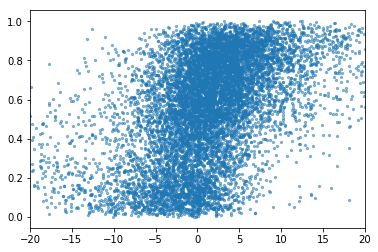

In [30]:
plt.scatter(pred, np.nanmean(measured, axis=1)[:,0], s=5, alpha=0.5)
plt.xlim(-20, 20)

In [31]:
spearmanr(pred, np.nanmean(measured, axis=1)[:,0], nan_policy='omit')

/opt/modules/i12g/anaconda/3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


SpearmanrResult(correlation=0.48541543922578334, pvalue=masked_array(data=0.,
             mask=False,
       fill_value=1e+20))

# With normal ensembl gtf annotation

In [21]:
fasta = "/s/genomes/human/hg19/ensembl_GRCh37.p13_release75/Homo_sapiens.GRCh37.75.dna.primary_assembly.fa"
GFF = "/s/genomes/human/hg19/ensembl_GRCh37.p13_release75/Homo_sapiens.GRCh37.75.chr22.gtf"

In [22]:
data = SplicingMaxEntDataset(GFF, fasta, side = "5prime", target_file = miso)

In [23]:
data_generator = DataLoader(data, batch_size=10, collate_fn=numpy_collate, shuffle=False)
data_generator = iter(data_generator)
batch = next(data_generator)

In [24]:
batch

{'inputs': array(['GAGGTCTGG', 'CAGGTATGG', 'CACGTAAGG', 'CCGGTGGGT', 'GCGGTAAGT',
        'CAGGTAATT', 'AAGGTAATC', 'GCGGTAAGT', 'CAGGTAGGT', 'CTGGTAAGC'],
       dtype='<U9'),
 'metadata': {'biotype': array(['lincRNA', 'pseudogene', 'pseudogene', 'pseudogene',
         'processed_transcript', 'processed_transcript',
         'processed_transcript', 'processed_transcript',
         'processed_transcript', 'processed_transcript'],
        dtype='<U20'),
  'extracted_regions': {'chr': array(['22', '22', '22', '22', '22', '22', '22', '22', '22', '22'],
         dtype='<U2'),
   'end': array([16062322, 16124744, 16118794, 16101278, 16192908, 16186813,
          16162399, 16192908, 16190683, 16189266]),
   'id': array(['ENSG00000233866', 'ENSG00000223875', 'ENSG00000223875',
          'ENSG00000223875', 'ENSG00000206195', 'ENSG00000206195',
          'ENSG00000206195', 'ENSG00000206195', 'ENSG00000206195',
          'ENSG00000206195'],
         dtype='<U15'),
   'start': array([16062314, 1

In [25]:
model.predict_on_batch(batch)

array([  2.59067064,   9.98516535,   7.46596816,   7.84953852,
        11.36823251,   8.55395318,   7.45705716,  11.36823251,
        10.28021334,   8.69415195])